In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
for i in df.select_dtypes([float, int]).columns:
    if i == "DiabetesPedigreeFunction" and i == "Insulin" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(2.5*IQR)
        ust_sinir = Q3+(2.5*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
        
    elif  i == "BloodPressure" and i == "BMI" and i == "Age" :
            Q1 = df[i].quantile(0.25)
            Q3 = df[i].quantile(0.75)
            IQR = Q3-Q1
            alt_sinir = Q1-(1.8*IQR)
            ust_sinir = Q3+(1.8*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
            aykiri_alt = df[i] < alt_sinir
            aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
            df[i][aykiri_alt] = alt_sinir
            df[i][aykiri_ust] = ust_sinir
    
    else : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.7*IQR)
        ust_sinir = Q3+(1.7*IQR)
    #print(f"{i} sutununun alt sınır değeri = {alt_sinir}")
    #print(f"{i} sutununun üst sınır değeri = {ust_sinir}")
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
    #print(i, "tablosunda toplamda =", df[i][aykiri_alt].count(),"aykırı alt veri vardır.")
    #print(i, "tablosunda toplamda =",df[i][aykiri_ust].count(), "aykırı üst veri vardır.")
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir

In [4]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

gr_model = GradientBoostingClassifier(random_state=42)
gr_model.fit(X_train, y_train)
eval_metric(gr_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 15]
 [20 34]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154


Train_Set
[[389  11]
 [ 37 177]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       400
           1       0.94      0.83      0.88       214

    accuracy                           0.92       614
   macro avg       0.93      0.90      0.91       614
weighted avg       0.92      0.92      0.92       614



In [9]:
from sklearn.model_selection import cross_validate

model = GradientBoostingClassifier(random_state=42 )

scores = cross_validate(model, X_test, y_test, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.700
test_recall      0.627
test_f1          0.625
test_accuracy    0.753
dtype: float64

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {"learning_rate": np.linspace(0,10)}

model = GradientBoostingClassifier(random_state=42)
grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1).fit(X_train, y_train)

In [14]:
grid_model.best_params_

{'learning_rate': 7.551020408163265}

In [15]:
np.linspace(0,10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [16]:
param_grid = {"n_estimators": [64,100,128,500,1000]}

model = GradientBoostingClassifier(random_state=42, learning_rate = 7.551020408163265)
grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1).fit(X_train, y_train)

In [17]:
grid_model.best_params_

{'n_estimators': 64}

In [18]:
x = 7.551020408163265

In [19]:
param_grid = {"max_depth": np.arange(2,20)}

model = GradientBoostingClassifier(random_state=42, learning_rate =x, n_estimators=64 )
grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1).fit(X_train, y_train)

In [20]:
grid_model.best_params_

{'max_depth': 3}

In [21]:
param_grid = {"min_samples_split": np.arange(2,20)}

model = GradientBoostingClassifier(random_state=42, learning_rate =x, n_estimators=64, max_depth=3)
grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1).fit(X_train, y_train)

In [22]:
grid_model.best_params_

{'min_samples_split': 2}

In [23]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 6 94]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.55      0.06      0.11       100
           1       0.34      0.91      0.50        54

    accuracy                           0.36       154
   macro avg       0.44      0.48      0.30       154
weighted avg       0.47      0.36      0.24       154


Train_Set
[[  6 394]
 [ 26 188]]
              precision    recall  f1-score   support

           0       0.19      0.01      0.03       400
           1       0.32      0.88      0.47       214

    accuracy                           0.32       614
   macro avg       0.26      0.45      0.25       614
weighted avg       0.23      0.32      0.18       614



In [24]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

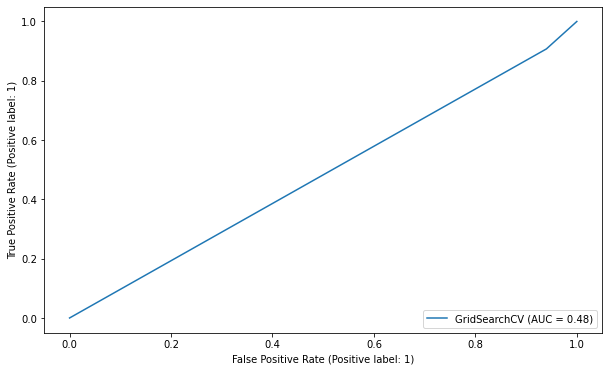

In [25]:
plot_roc_curve(grid_model, X_test, y_test, pos_label=1);

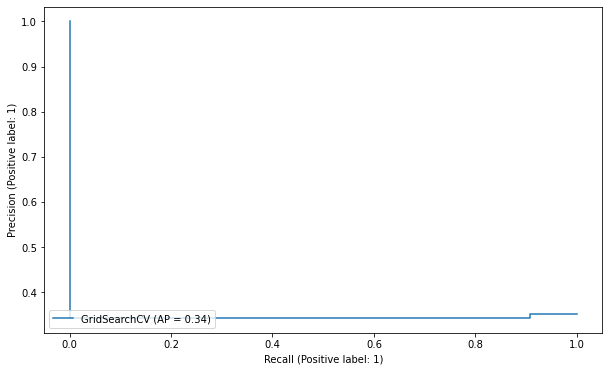

In [26]:
plot_precision_recall_curve(grid_model, X_test, y_test, pos_label=1);

In [28]:
y_pred_proba = gr_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate) 

optimal_threshold = thresholds[optimal_idx] # en iyi threshold değerimizin olduğu indexi arraye vererek buluruz.
optimal_threshold

0.23725864712135009

In [30]:
y_pred = pd.Series(grid_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= 0.237 else 0)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6 94]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.55      0.06      0.11       100
           1       0.34      0.91      0.50        54

    accuracy                           0.36       154
   macro avg       0.44      0.48      0.30       154
weighted avg       0.47      0.36      0.24       154



In [31]:
y_pred = pd.Series(grid_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= 0.24 else 0)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[  6 394]
 [ 26 188]]
              precision    recall  f1-score   support

           0       0.19      0.01      0.03       400
           1       0.32      0.88      0.47       214

    accuracy                           0.32       614
   macro avg       0.26      0.45      0.25       614
weighted avg       0.23      0.32      0.18       614



In [32]:
from sklearn.model_selection import StratifiedKFold

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    # for ile manuel olarak cross validation train ve test verilerini seçiyoruz.
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    # aldığımız her skoru yukarıda tanımlanan boş listeye atıyoruz. 
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%') 
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [34]:
model = GradientBoostingClassifier(random_state=42, learning_rate =x, n_estimators=64, max_depth=3, min_samples_split=2)
model.fit(X, y)

GradientBoostingClassifier(learning_rate=7.551020408163265, n_estimators=64,
                           random_state=42)

In [37]:
CV(10, model, pd.DataFrame(X), y, 0.2)

Accuracy      36.87%  std 13.72%
Precision-1   32.74%  std 10.26%
Recall-1      75.51%  std 23.53%
F1_score-1    45.18%  std 12.90%
